# Calcul Numeric - Laborator 4 - Data Visualization II

### Obiectiv

În acest laborator vom aborda vizualizarea datelor multi-dimensionale și modul în care putem crea animații.

In [1]:
import matplotlib.pyplot as plt
%matplotlib widget

import numpy as np

import matplotlib.cbook as cbook
import matplotlib.cm as cm
from matplotlib.patches import PathPatch
from matplotlib.path import Path

# Fixăm un seed pentru reproducerea rezultatelor 
np.random.seed(19680801)

In [3]:
!pip install "notebook<7"

  Using cached pyzmq-24.0.1-cp311-cp311-win_amd64.whl.metadata (4.8 kB)
Using cached pyzmq-24.0.1-cp311-cp311-win_amd64.whl (990 kB)
  Attempting uninstall: pyzmq
    Found existing installation: pyzmq 25.1.2
    Uninstalling pyzmq-25.1.2:
      Successfully uninstalled pyzmq-25.1.2
  Rolling back uninstall of pyzmq
  Moving to c:\users\georg\appdata\roaming\python\python311\site-packages\pyzmq-25.1.2.dist-info\
   from C:\Users\georg\AppData\Roaming\Python\Python311\site-packages\~yzmq-25.1.2.dist-info
  Moving to c:\users\georg\appdata\roaming\python\python311\site-packages\pyzmq.libs\
   from C:\Users\georg\AppData\Roaming\Python\Python311\site-packages\~-zmq.libs
  Moving to c:\users\georg\appdata\roaming\python\python311\site-packages\zmq\
   from C:\Users\georg\AppData\Roaming\Python\Python311\site-packages\~-q


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\georg\\anaconda3\\envs\\gpytorch\\Lib\\site-packages\\pyzmq.libs\\libsodium-ac42d648.dll'
Consider using the `--user` option or check the permissions.



## Grafice de contur și suprafață

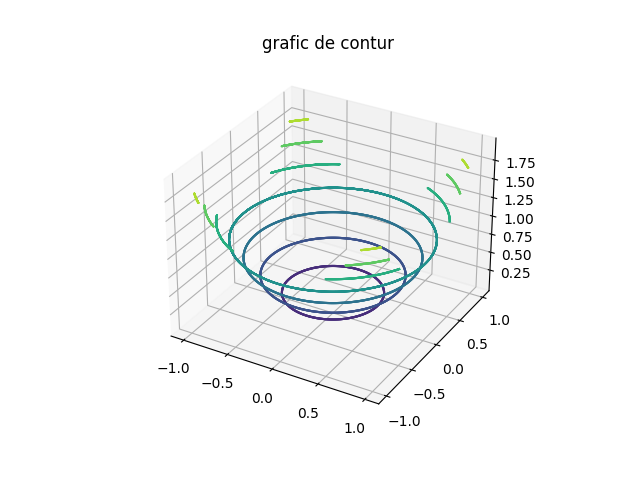

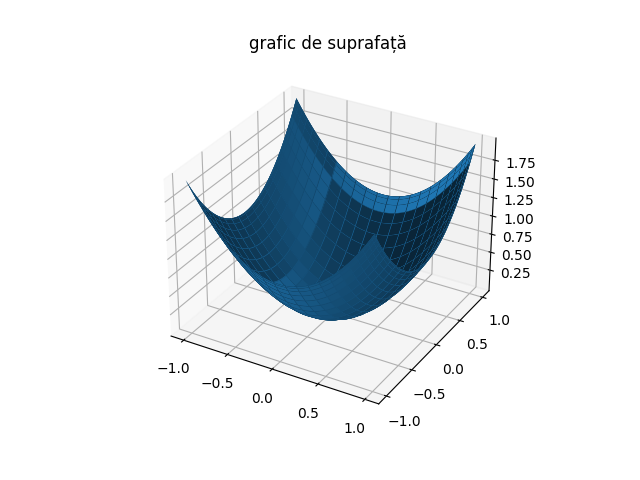

In [2]:
from mpl_toolkits.mplot3d import Axes3D 
  
a = np.cos(np.linspace(0, 2 * np.pi, 1000))
b = np.sin(np.linspace(0, 2 * np.pi, 1000))
a, b = np.meshgrid(a, b) 
  
fig = plt.figure() 
axes = fig.add_subplot(projection = '3d')
axes.contour(a, b, a**2 + b**2) 
plt.title('grafic de contur')
plt.show() 

fig = plt.figure() 
axes = fig.add_subplot(projection = '3d')
axes.plot_surface(a, b, a**2 + b**2) 
plt.title('grafic de suprafață')
plt.show() 

Ce diferențe observati?

## Plotarea imaginilor

De obicei, imaginile se plotează cu metoda `imshow` din pachetul matplotlib (vezi [documentația](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html#)). Cu ajutorul imaginilor putem vizualiza distribuții într-un spațiu bidimensional. Vom explora în continuare crearea imaginilor ce folosesc un colormap (o hartă de culori). Datele se vor introduce ca input pentru metoda `imshow` sub forma unei matrice 2D, iar harta de culoare va atribui fiecărui element din imagine (pixel) o anumită culoare corespunzătoare valorii din matrice a acelui element.

In [ ]:
step = 0.025
x = y = np.arange(-3.0, 3.0, step)    
X, Y = np.meshgrid(x, y)  # definim un grid cu valori cuprinse între -3 și 3 conform output-ul funcției arange

def f(X, Y):
    return (np.exp(-X**2 - Y**2) - np.exp(-(X - 1)**2 - (Y - 1)**2)) * 2   
    

# generăm valorile care vor fi vizualizate - folosim funcția f pe care o putem schimba după bunul plac
Z = f(X, Y)
# dacă X și Y sunt independente, atunci f se mai numește și funcție bivariată

fig, ax = plt.subplots()
im = ax.imshow(Z, cmap=cm.RdYlGn, extent=[-3, 3, -3, 3],
               vmax=abs(Z).max(), vmin=-abs(Z).max())      # vmin și vmax sunt limitele impuse hărții de culoare
fig.colorbar(im)   # creăm un colorbar (o bară de culori) pentru a vedea valorile corespunzătoare culorilor
plt.show()

Observați că am folosit `meshgrid` pentru `x` și `y`. Aceasă funcție returnează două matrice 2D prin care obținem toate perechile posibile `(x,y)`. Astfel, obținem un grid discret și reprezentativ pentru spațiul bidimensional pe care vrem să îl reproducem. Fiecare valoare din grid (`Z`) va fi calculată aplicând funcția `f` perechilor generate anterior. Același lucru îl puteți obține și prin broadcasting.

### Exercițiu
- Modificați argumentele cheie `vmax` și `vmin` ale metodei `imshow` și vedeți ce se întâmplă. 
- Alegeți o altă funcție bivariată și folosiți această funcție pentru a face un nou plot.
- Inserați un text pe imagine folosind `ax.text()`. Verificați https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.text.html pentru mai multe detalii.

#### De ce folosim meshgrid?

In [ ]:
# un alt exemplu cu meshgrid
x = np.arange(0, 1000, 100)
y = np.arange(0, 5, 1)
X, Y = np.meshgrid(x, y)
print(f"x={x}")
print(f"y={y}")
print(f"meshgrid output = {X, Y}")

# inițializăm grid-ul
print(f'grid shape = {X.shape}')  # X și Y au același shape
grid = np.empty(X.shape, dtype="<U10")  # <U10 ---> string Unicode de lungime 10; little endian format


# fiecare element din grid (un „pixel” din imagine) corespunde unei perechi (x, y)
for i in range(grid.shape[0]):
    for j in range(grid.shape[1]):
        grid[i][j] = f"x={x[j]}, y={y[i]}"
        
print(grid)  


# să calculăm de exemplu suma x + y pentru fiecare pereche (x, y) din grid
print(X + Y) 

# în același mod am folosit meshgrid și în exemplul cu funcția bivariată f

In [ ]:
# o imagine de probă

image_path = cbook.get_sample_data('logo2.png', asfileobj=False)  
# matplotlib are câteva date de probă, iar get_sample_data ne dă calea către aceste date
# puteți modifica path-ul pentru o altă imagine de pe mașina voastră (de exemplu - C:\Users\georg\OneDrive\Imagini\vadim.png)

image_file = open(image_path, 'rb')  
# r - pentru fișiere text, rb - pentru fișiere binare, trebuie adăugat b de la binar
image = plt.imread(image_file)

# imagini 256x256 pe 16 biți
w, h = 256, 256
with cbook.get_sample_data('s1045.ima.gz') as datafile:
    s = datafile.read()
A = np.frombuffer(s, np.uint16).astype(float).reshape((w, h))
extent = (0, 25, 0, 25)


fig, ax = plt.subplot_mosaic([
    ['logo', 'mri']
], figsize=(7, 3.5))

# logo 
ax['logo'].imshow(image)
ax['logo'].axis('off')  # deci nu afișăm axele (Ox și Oy) pentru imaginea de probă logo

# MRI 256x256 
im = ax['mri'].imshow(A, cmap=plt.cm.hot, origin='upper', extent=extent)
markers = [(15.9, 14.5), (16.8, 15)]
x, y = zip(*markers)
ax['mri'].plot(x, y, 'o')   # mai plotăm doi markeri să vedem cum se face
ax['mri'].set_title('MRI') 

plt.show()

## Interpolarea imaginilor

Este posibil să interpolezi și imaginile înainte de a le afișa. Acest lucru poate manipula modul în care arată datele, fiind util pentru
a obține aspectul dorit. Mai jos vom afișa aceeași matrice (mică),
interpolată cu trei diferite metode de interpolare.

Centrul pixelului la A[i, j] este trasat la (i+0,5, j+0,5). Dacă
folosești interpolare de tip 'nearest', zona delimitată de (i, j) și
(i+1, j+1) va avea aceeași culoare. Dacă folosești alt tip de interpolare,
centrul pixelului va avea aceeași culoare ca și în cazul precedent, dar
alți pixeli vor fi interpolați între pixelii învecinați.

Pentru a preveni efectele de margine în timpul interpolării, se completează matricea de intrare
cu pixeli identici în jurul marginii: dacă ai o matrice 5x5 cu
culorile a-y ca mai jos:

```
  a b c d e
  f g h i j
  k l m n o
  p q r s t
  u v w x y 

```

Matplotlib calculează interpolarea și redimensionarea pe matricea completată:
```
  a a b c d e e
  a a b c d e e
  f f g h i j j
  k k l m n o o
  p p q r s t t
  o u v w x y y
  o u v w x y y
```


și apoi extrage regiunea centrală a rezultatului. (Versiunile extrem de vechi
ale Matplotlib (<0,63) nu completau matricea, ci ajustau limitele vizuale
pentru a ascunde zonele de margine afectate.)

**Interpolarea este o tehnică de calcul numeric pentru a estima valorile punctelor în intervalele lipsă pentru a completa "golurile". Veți studia mai multe metode de interpolare într-unul dintre următoarele cursuri.**

### Exemplu de interpolare

In [ ]:
A = np.random.normal(scale=5, size=(10, 10))

fig, axs = plt.subplots(1, 3, figsize=(10, 3))

axs[0].imshow(A)
axs[0].set_title("Original")

axs[1].imshow(A, interpolation='bilinear')
axs[1].set_title('Bilinear')    
    
axs[2].imshow(A, interpolation='bicubic')
axs[2].set_title('Bicubic')


plt.show()

### Exercțiu
- Generați un tablou cu 625 elemente folosind `linspace`
- Aplicați un reshape pentru a obține o matrice pătratică și plotați aceasta folosind `imshow`.
- Adăugați un colormap. Explorați diferite hărți de culoare: https://matplotlib.org/stable/gallery/color/colormap_reference.html
- Plotați din nou imaginea, dar folosind o interpolare gaussiană. Ce observați? 

### Imagini de tip „Heatmap”

Începem prin a defini datele. Avem nevoie de un tablou/o listă 2D care să conțină datele sub forma unui grid. Alte două liste sunt necesare pentru a eticheta fiecare element din tabloul 2D pe cele două axe. Fiecare element din grid va avea o perche distinctă de etichete. Un „heatmap” va fi în final un plot `imshow` cu etichete customizate (de obicei, string-uri în loc de valori numerice). Etichetele sunt setate folosind (`set_xticks`) pentru locații și (`set_xticklabels`) pentru nume. Locația etichetelor se definește printr-un număr întreg.

In [ ]:
vegetables = ["cucumber", "tomato", "lettuce", "asparagus",
              "potato", "wheat", "barley"]
farmers = ["Farmer Joe", "Upland Bros.", "Smith Gardening",
           "Agrifun", "Organiculture", "BioGoods Ltd.", "Cornylee Corp."]

harvest = np.array([[0.8, 2.4, 2.5, 3.9, 0.0, 4.0, 0.0],
                    [2.4, 0.0, 4.0, 1.0, 2.7, 0.0, 0.0],
                    [1.1, 2.4, 0.8, 4.3, 1.9, 4.4, 0.0],
                    [0.6, 0.0, 0.3, 0.0, 3.1, 0.0, 0.0],
                    [0.7, 1.7, 0.6, 2.6, 2.2, 6.2, 0.0],
                    [1.3, 1.2, 0.0, 0.0, 0.0, 3.2, 5.1],
                    [0.1, 2.0, 0.0, 1.4, 0.0, 1.9, 6.3]])


fig, ax = plt.subplots()
im = ax.imshow(harvest)

# afișăm toate etichetele și le atribuim numele folosind listele de mai sus
ax.set_xticks(np.arange(len(farmers)), labels=farmers) 
ax.set_yticks(np.arange(len(vegetables)), labels=vegetables)

# rotim etichetele de pe Ox cu 45 de grade în dreapta 
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# iterăm pentru a scrie cu text valorile numerice ale fiecărui element
for i in range(len(vegetables)):
    for j in range(len(farmers)):
        text = ax.text(j, i, harvest[i, j],
                       ha="center", va="center", color="w")

ax.set_title("Harvest of local farmers (in tons/year)")
fig.tight_layout()
plt.show()

Exemplul a fost preluat din documentația matplotlib: https://matplotlib.org/stable/gallery/images_contours_and_fields/image_annotated_heatmap.html

Puteți găsi pe link-ul de mai sus și alte exemple de heatmap-uri, chiar și mai avansate.

### Exercițiu

- Creează un heatmap pentru a vizualiza rezultatele grupei I din cadrul calificărilor pentru UEFA Euro 2024 ([date aici](https://en.wikipedia.org/wiki/UEFA_Euro_2024_qualifying_Group_I))

- Ai putea implementa următoarele:
    - Afișați diferența de goluri pentru fiecare meci ca text (de exemplu - +2/-1) 
    - Diferențele de gol pozitive sunt afișate cu verde, iar cele negative cu roșu (de exemplu - RdYlGn) sau [îți poți face propria hartă de culori](https://matplotlib.org/stable/gallery/color/custom_cmap.html)
    - Customizați etichetele pentru a afișa codul fiecărei țări (de exemplu - ROU pentru România)
    
<right>
<img width=250 src=https://i.ibb.co/dW5N7sw/Captur-de-ecran-2024-03-07-183349.png/>
    </right>

## Animații

### ``FuncAnimation``

Clasa `~matplotlib.animation.FuncAnimation` ne permite să creăm o animație prin furnizarea unei funcții care modifică iterativ datele unui grafic. Acest lucru se realizează prin utilizarea metodelor *setter* pe diverse obiecte `~matplotlib.artist.Artist` (exemple: `~matplotlib.lines.Line2D`, `~matplotlib.collections.PathCollection`, etc.). Un obiect obișnuit `~matplotlib.animation.FuncAnimation` primește un `~matplotlib.figure.Figure` pe care dorim să-l animăm și o funcție *func* care modifică datele desenate pe figură. Se folosește parametrul *frames* pentru a determina durata animației (numărul de cadre). Parametrul *interval* este folosit pentru a determina timpul în milisecunde între desenarea a două cadre. Pentru a creea o animație cu `.FuncAnimation` se urmează următorii pași:

- Se desenează figura inițială, incluzând toate obiectele necesare de tip artist (îi vom numi artiști, e.g. lines, scatter plots). Salvează toți artiștii în variabile astfel încât să poată fi actualizați ulterior în timpul animației.
- Se creează o funcție care actualizează datele din fiecare artist pentru a genera noul cadru la fiecare apel al funcției.
- Se creează un obiect `.FuncAnimation` cu `.Figure` și funcția de la pasul anterior, împreună cu argumentele cheie care determină proprietățile animației.
- Se folosește `.animation.Animation.save` sau `.pyplot.show` pentru a salva sau afișa animația.

  
https://matplotlib.org/stable/users/explain/animations/animations.html
https://matplotlib.org/stable/api/_as_gen/matplotlib.animation.FuncAnimation.html#matplotlib.animation.FuncAnimation

### Un simplu exemplu - animație de zgomot

In [ ]:
import matplotlib.animation as animation
%matplotlib notebook
# %matplotlib widget - în caz că notebook nu funcționează în vscode sau alt IDE

fig, ax = plt.subplots()

def update(frame):
    # generăm zgomot aleator folosind o distribuție normală
    noise = np.random.normal(size=(32, 32)) 
    # actualizăm imaginea
    im = ax.imshow(noise, cmap='binary')
    ax.text(0, 0.5, frame)
    
    return im


ani = animation.FuncAnimation(fig=fig, func=update, frames=40, interval=30) 
# 40 de frame-uri, fiecare frame se afișează la un interval de 30 ms dupa cel precedent

plt.show()

### Animație cu lansarea unui proiectil cu diferite viteze

In [ ]:
# %matplotlib widget - pentru vscode

fig, ax = plt.subplots()
t = np.linspace(0, 3, 40)
g = -9.81


# implementarea fizicii

v0 = 12 # viteza primului proiectil
z = g * t**2 / 2 + v0 * t

v02 = 5 # viteza celui de-al doilea proiectil
z2 = g * t**2 / 2 + v02 * t


# definim artiștii (scatter, line plots)
scat = ax.scatter(t[0], z[0], c="b", s=5, label=f'v0 = {v0} m/s')
line2 = ax.plot(t[0], z2[0], label=f'v0 = {v02} m/s')[0]
ax.set(xlim=[0, 3], ylim=[-4, 10], xlabel='Time [s]', ylabel='Z [m]')
ax.legend()


def update(frame):
    # pentru fiecare frame, actualizăm datele pentru fiecare artist
    x = t[:frame]
    y = z[:frame]
    # actualizăm artistul scatter
    data = np.stack([x, y]).T
    scat.set_offsets(data)
    # actualizăm artistul line
    line2.set_xdata(t[:frame])
    line2.set_ydata(z2[:frame])
    return (scat, line2) 


ani = animation.FuncAnimation(fig=fig, func=update, frames=40, interval=30, repeat=False)
plt.show()

Explorează mai multe exemple!
- https://jakevdp.github.io/blog/2012/08/18/matplotlib-animation-tutorial/
- https://www.geeksforgeeks.org/matplotlib-animation-funcanimation-class-in-python/
- https://www.tutorialspoint.com/how-to-create-animations-in-python

### Exercițiu
În acest exercițiu vom simula mișcarea circulară a unui obiect.

- Să considerăm un punct arbitrar pe un cerc de rază $r=1$. Definiți o funcție care să returneze coordonatele x și y pentru acest punct cunoscând poziția unghiulară $u$. Cercul este centrat în orgine la $(0, 0)$, astfel încât:
$$x=sin(u)$$
$$y=cos(u)$$
- Generați imaginea unui cerc aplicând funcția implementată mai sus pe un set de valori generate uniform în intervalul $[0, 2\pi)$. Folosiți un line plot (nu scatter).
- Plotați un punct individual la $u=\pi/2$ cu un marker de dimensiune 8
- Creați animația unui obiect care se mișcă pe o traiectorie circulară descrisă de funcția de mai sus. Indiciu: incrementați valoarea unghiului $u$ pentru a mișca obiectul pe cerc - $u = u + du$. Încercați să simulați diferite viteze de rotație.

In [ ]:
# observați că np.sin și np.cos lucrează cu radiani! Folosiți valoarea lui pi pentru a echivala 180 de grade: np.pi = 3,14159...
u = np.pi/4
sin_u = np.sin(u)
print(u, sin_u)